## Overfitting

In [5]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os
os.chdir("/content/drive/My Drive/AIMOOC")
!ls

import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Mounted at /content/drive/
Modules  Staff


## Load the Temperature Data

In [6]:
df = pd.read_csv("/content/drive/My Drive/AIMOOC/Modules/Module2/Data/temperature_boston_monthly_2years.csv")
df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,North America,US,Massachusetts,Boston,1,1,2016,39.1
1,North America,US,Massachusetts,Boston,2,1,2016,49.5
2,North America,US,Massachusetts,Boston,3,1,2016,41.6
3,North America,US,Massachusetts,Boston,4,1,2016,63.1
4,North America,US,Massachusetts,Boston,5,1,2016,48.2
5,North America,US,Massachusetts,Boston,6,1,2016,68.8
6,North America,US,Massachusetts,Boston,7,1,2016,75.5
7,North America,US,Massachusetts,Boston,8,1,2016,70.6
8,North America,US,Massachusetts,Boston,9,1,2016,74.4
9,North America,US,Massachusetts,Boston,10,1,2016,56.9


## Fit Many Different Degree Curves Using Linear Regression

We modify the code below to use degree 1, then 2, then 3, and so on, up to a degree 11 polynomial fit to the temperature data. We also show the predictions for the July temperature over 4 years. The first 2 years' predictions are within our data range, but the year 3 and 4 predictions are beyond our data range. How does each model do in prediction year 3 and 4 temperatures?

Coefficients: [0.         0.09373913]
Intercept: 53.75533333333334
R^2: 0.0023365783464576184
July of Year 1: [54.31776812]
July of Year 2: [55.44263768]
July of Year 3: [56.56750725]
July of Year 4: [57.69237681]


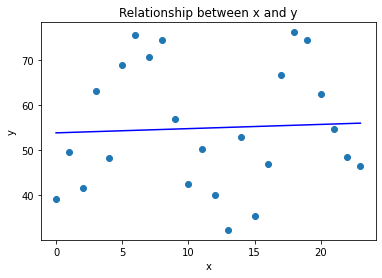

In [58]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
df['idx'] = df.index
x = df[['idx']]
poly_trans = PolynomialFeatures(degree=1)
x_trans = poly_trans.fit_transform(x)
y = df["AvgTemperature"]
lin_reg = lm.LinearRegression()
lin_reg.fit(x_trans, y) 
print('Coefficients:', lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)
print('R^2:', lin_reg.score(x_trans, y))
plt.scatter(x, y)
ypred = lin_reg.predict(x_trans)
plt.plot(x, ypred, color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Relationship between x and y")

print("July of Year 1:", lin_reg.predict(poly_trans.fit_transform([[6]])))
print("July of Year 2:", lin_reg.predict(poly_trans.fit_transform([[18]])))
print("July of Year 3:", lin_reg.predict(poly_trans.fit_transform([[30]])))
print("July of Year 4:", lin_reg.predict(poly_trans.fit_transform([[42]])))

## Plot Predicted Temperature Values

Coefficients: [ 0.00000000e+00  1.34453306e+01  2.24375671e+00 -1.00927034e+01
  5.66576768e+00 -1.46548400e+00  2.14657331e-01 -1.92617323e-02
  1.08219200e-03 -3.71816838e-05  7.14727114e-07 -5.89024829e-09]
Intercept: 38.79292632379414
R^2: 0.8089184940004698
July of Year 1: [74.48882265]
July of Year 2: [73.610765]
July of Year 3: [-186597.97631292]
July of Year 4: [-97000014.74652289]


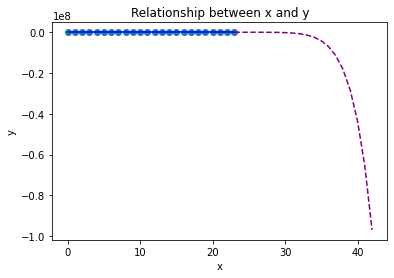

In [77]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
df['idx'] = df.index
x = df[['idx']]
poly_trans = PolynomialFeatures(degree=11)
x_trans = poly_trans.fit_transform(x)
y = df["AvgTemperature"]
lin_reg = lm.LinearRegression()
lin_reg.fit(x_trans, y) 
print('Coefficients:', lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)
print('R^2:', lin_reg.score(x_trans, y))
plt.scatter(x, y)
ypred = lin_reg.predict(x_trans)
plt.plot(x, ypred, color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Relationship between x and y")

# Plot predicted future values
ex_x = np.arange(23,43).reshape(-1,1)
ex_pred = lin_reg.predict(poly_trans.fit_transform(ex_x))
plt.plot(ex_x, ex_pred, color='purple', linestyle='--')

print("July of Year 1:", lin_reg.predict(poly_trans.fit_transform([[6]])))
print("July of Year 2:", lin_reg.predict(poly_trans.fit_transform([[18]])))
print("July of Year 3:", lin_reg.predict(poly_trans.fit_transform([[30]])))
print("July of Year 4:", lin_reg.predict(poly_trans.fit_transform([[42]])))